<a href="https://colab.research.google.com/github/a4ankan/Amazon-Fine-Food/blob/master/LSTM_on_amazon_fine_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import pandas as pd
import io


final =  pd.read_csv('gdrive/My Drive/CSV/final_cleaned.csv')
final.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,New
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,everi book educ,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,everi book educwitti littl book make son laugh...
1,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,whole seri great way spend time child,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...,whole seri great way spend time childrememb se...
2,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,entertainingl funni,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...,entertainingl funnibeetlejuic well written mov...
3,346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,modern day fairi tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...,modern day fairi taletwist rumplestiskin captu...
4,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,fantast,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...,fantastbeetlejuic excel funni movi keaton hila...


In [4]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout

Using TensorFlow backend.


In [5]:
final['Score'].value_counts()

 1    307061
-1     57110
Name: Score, dtype: int64

In [6]:
final.Score.replace(to_replace= -1, value=0, inplace=True)
final['Score'].value_counts()

1    307061
0     57110
Name: Score, dtype: int64

In [7]:
final.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,New
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,everi book educ,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,everi book educwitti littl book make son laugh...
1,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,whole seri great way spend time child,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...,whole seri great way spend time childrememb se...
2,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,entertainingl funni,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...,entertainingl funnibeetlejuic well written mov...
3,346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,modern day fairi tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...,modern day fairi taletwist rumplestiskin captu...
4,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,fantast,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...,fantastbeetlejuic excel funni movi keaton hila...


In [0]:
final = final[0:50000] #taking the first 50k reviews

In [9]:
z = final['New'].values
z

array(['everi book educwitti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg',
       'whole seri great way spend time childrememb see show air televis year ago child sister later bought day thirti someth use seri book song student teach preschool turn whole school purchas along book children tradit live',
       'entertainingl funnibeetlejuic well written movi everyth excel act special effect delight chose view movi',
       ...,
       'baconnaiswould thought great stuff vegetarian mayo tast like bacon work well burger sandwich salad egg salad etc dip complaint jar small ounc even though sodium content relat low tast saltier side actual take baconnais mix regular mayo cut back salti make smaller jar last longer',
       'good stuffenergi berri bttls satisfi product drink cup coffe go bed sleep like babi even drink red bull result there energi d

In [10]:
from nltk import FreqDist

#https://stackoverflow.com/questions/41699065/create-vocabulary-dictionary-for-text-mining


train_set = final["New"]
word_dist = FreqDist()
for s in train_set:
    word_dist.update(s.split())

word_dist = dict(word_dist)
word_dist

{'everi': 2989,
 'book': 424,
 'educwitti': 1,
 'littl': 6732,
 'make': 11801,
 'son': 1036,
 'laugh': 84,
 'loud': 43,
 'recit': 3,
 'car': 261,
 'drive': 220,
 'along': 700,
 'alway': 2882,
 'sing': 47,
 'refrain': 3,
 'hes': 341,
 'learn': 395,
 'whale': 4,
 'india': 164,
 'droop': 6,
 'love': 13563,
 'new': 1984,
 'word': 474,
 'introduc': 318,
 'silli': 58,
 'classic': 328,
 'will': 155,
 'bet': 119,
 'still': 3215,
 'abl': 1449,
 'memori': 247,
 'colleg': 172,
 'whole': 2831,
 'seri': 56,
 'great': 20108,
 'way': 4247,
 'spend': 376,
 'time': 7991,
 'childrememb': 1,
 'see': 2190,
 'show': 444,
 'air': 268,
 'televis': 15,
 'year': 4976,
 'ago': 1163,
 'child': 391,
 'sister': 224,
 'later': 626,
 'bought': 2571,
 'day': 4929,
 'thirti': 37,
 'someth': 2730,
 'use': 13775,
 'song': 35,
 'student': 99,
 'teach': 50,
 'preschool': 21,
 'turn': 1096,
 'school': 382,
 'purchas': 3121,
 'children': 581,
 'tradit': 676,
 'live': 1401,
 'entertainingl': 1,
 'funnibeetlejuic': 1,
 'well'

In [11]:
type(word_dist)

dict

In [12]:
import operator
word_dist = sorted(word_dist.items(), key=operator.itemgetter(1),reverse = True)
word_dist

[('tast', 22261),
 ('like', 21038),
 ('great', 20108),
 ('good', 19175),
 ('tea', 18516),
 ('flavor', 17186),
 ('one', 14636),
 ('product', 14559),
 ('use', 13775),
 ('love', 13563),
 ('tri', 12326),
 ('make', 11801),
 ('get', 10526),
 ('best', 9955),
 ('coffe', 9101),
 ('food', 8617),
 ('eat', 8302),
 ('would', 8177),
 ('time', 7991),
 ('buy', 7941),
 ('find', 7437),
 ('also', 7419),
 ('realli', 7276),
 ('dont', 7132),
 ('amazon', 7130),
 ('much', 7109),
 ('littl', 6732),
 ('even', 6484),
 ('order', 6443),
 ('drink', 6390),
 ('price', 6195),
 ('better', 6190),
 ('chocol', 6159),
 ('bag', 6102),
 ('well', 6066),
 ('mix', 5873),
 ('sugar', 5827),
 ('store', 5725),
 ('box', 5507),
 ('sweet', 5473),
 ('dog', 5332),
 ('ive', 5307),
 ('recommend', 5101),
 ('year', 4976),
 ('high', 4946),
 ('day', 4929),
 ('delici', 4775),
 ('treat', 4696),
 ('cup', 4502),
 ('found', 4435),
 ('want', 4400),
 ('give', 4357),
 ('enjoy', 4352),
 ('favorit', 4289),
 ('way', 4247),
 ('add', 4192),
 ('water', 4162

In [13]:
type(word_dist)

list

In [14]:
word_dist[:15]

[('tast', 22261),
 ('like', 21038),
 ('great', 20108),
 ('good', 19175),
 ('tea', 18516),
 ('flavor', 17186),
 ('one', 14636),
 ('product', 14559),
 ('use', 13775),
 ('love', 13563),
 ('tri', 12326),
 ('make', 11801),
 ('get', 10526),
 ('best', 9955),
 ('coffe', 9101)]

In [0]:
#https://stackoverflow.com/questions/3071415/efficient-method-to-calculate-the-rank-vector-of-a-list-in-python


'''a={}
  rank=1
  for num in sorted(vector):
    if num not in a:
      a[num]=rank
      rank=rank+1 '''

a = {}
rank = 1
for num in range(len(word_dist)):
    i = word_dist[num][0]
    a[i] = rank
    rank+=1

In [0]:
X = []
for sent in z:
    rows = []
    for word in sent.split():
        rows.append(a[word])
    X.append(rows)

In [0]:
#X[:20]

In [0]:
Y = final['Score']


In [0]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0,shuffle = False)

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
import warnings
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 5]
warnings.filterwarnings("ignore", category=FutureWarning)
%config InlineBackend.figure_format = 'retina'

In [22]:
# truncate and/or pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(40000, 600)
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0  

In [0]:
top_words = 5000
epochs = 10
batch_size = 64

**RELU activation with less layers**

In [30]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 600, 32)           160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
from datetime import datetime

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 753s 19ms/step - loss: 14.3317 - acc: 0.1105 - val_loss: 14.1597 - val_acc: 0.1215
Epoch 2/10
40000/40000 [==============================] - 751s 19ms/step - loss: 14.3370 - acc: 0.1105 - val_loss: 14.1597 - val_acc: 0.1215
Epoch 3/10
40000/40000 [==============================] - 748s 19ms/step - loss: 14.3370 - acc: 0.1105 - val_loss: 14.1597 - val_acc: 0.1215
Epoch 4/10
40000/40000 [==============================] - 745s 19ms/step - loss: 14.3370 - acc: 0.1105 - val_loss: 14.1597 - val_acc: 0.1215
Epoch 5/10
40000/40000 [==============================] - 748s 19ms/step - loss: 14.3370 - acc: 0.1105 - val_loss: 14.1597 - val_acc: 0.1215
Epoch 6/10
40000/40000 [==============================] - 750s 19ms/step - loss: 14.3370 - acc: 0.1105 - val_loss: 14.1597 - val_acc: 0.1215
Epoch 7/10
40000/40000 [==============================] - 748s 19ms/step - loss: 14.3370 - acc: 0.1105 -

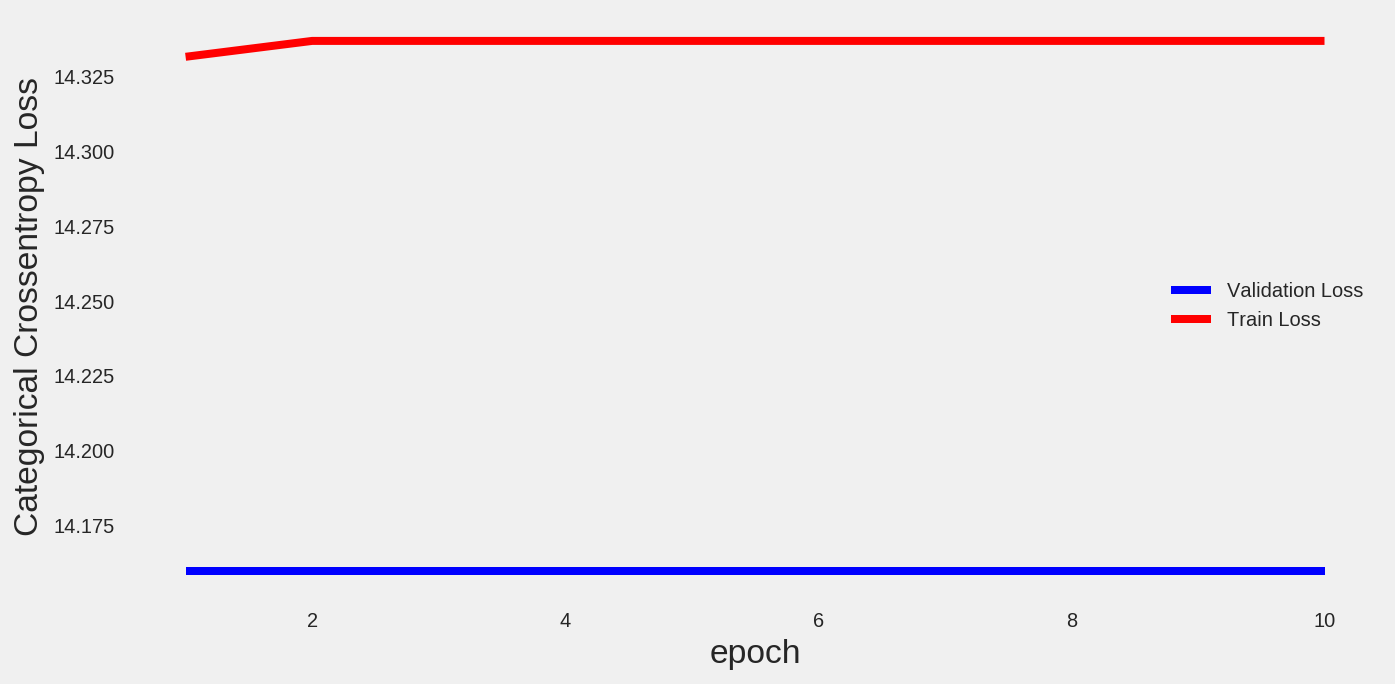

In [31]:
start = datetime.now()


history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, verbose=1,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))


score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs +1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


print('Time taken to run this cell :', datetime.now() - start)

**Sigmoid**

In [35]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 600, 32)           160000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 764s 19ms/step - loss: 0.3455 - acc: 0.8897 - val_loss: 0.3673 - val_acc: 0.8788
Epoch 2/10
40000/40000 [==============================] - 758s 19ms/step - loss: 0.3440 - acc: 0.8896 - val_loss: 0.3655 - val_acc: 0.8785
Epoch 3/10
40000/40000 [==============================] - 757s 19ms/step - loss: 0.3408 - acc: 0.8894 - val_loss: 0.3645 - val_acc: 0.8787
Epoch 4/10
40000/40000 [==============================] - 756s 19ms/step - loss: 0.3332 - acc: 0.8893 - val_loss: 0.3548 - val_acc: 0.8774
Epoch 5/10
40000/40000 [==============================] - 760s 19ms/step - loss: 0.3189 - acc: 0.8888 - val_loss: 0.3453 - val_acc: 0.8763
Epoch 6/10
40000/40000 [==============================] - 765s 19ms/step - loss: 0.2988 - acc: 0.8901 - val_loss: 0.3326 - val_acc: 0.8798
Epoch 7/10
40000/40000 [==============================] - 763s 19ms/step - loss: 0.5015 - acc: 0.8909 - val_loss: 1.

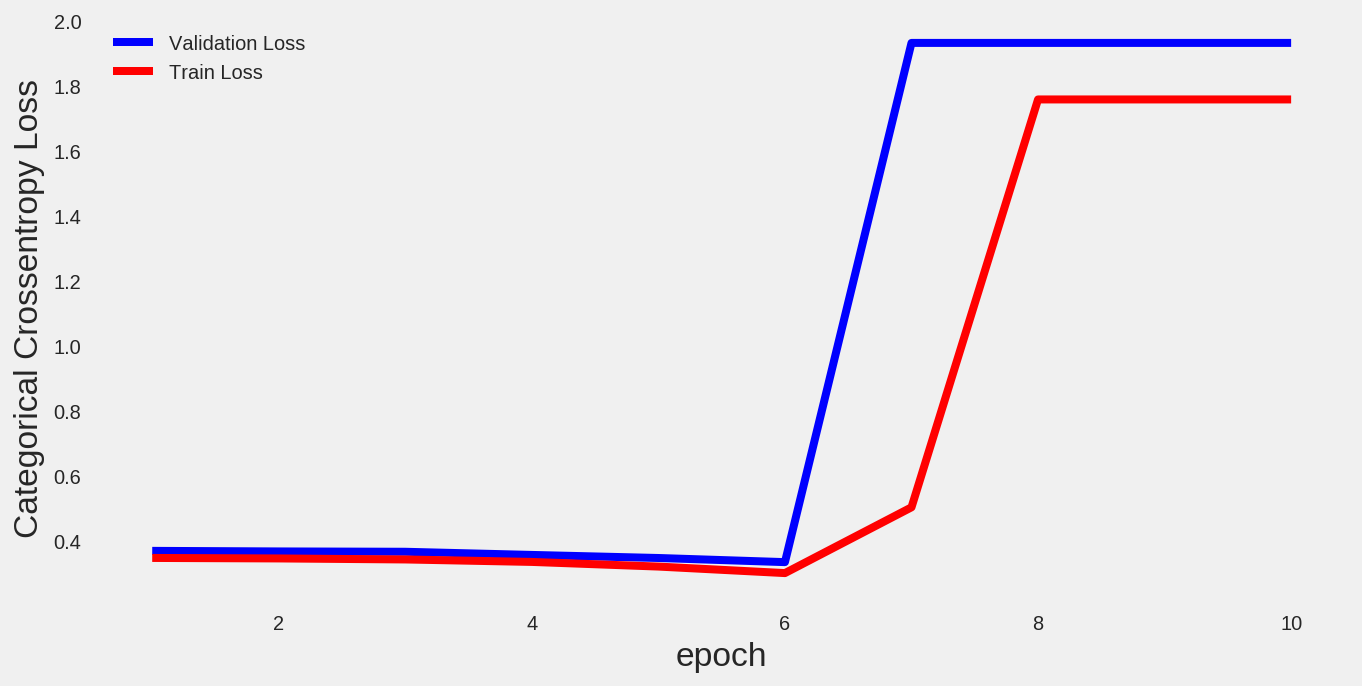

In [37]:
start = datetime.now()


history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, verbose=1,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))


score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs +1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


print('Time taken to run this cell :', datetime.now() - start)

Deep **LSTMs** with batch normalizations and dropout

In [41]:
from keras.layers.normalization import BatchNormalization


# create the model
embedding_vecor_length = 64
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(BatchNormalization())
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(LSTM(100))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 600, 64)           320000    
_________________________________________________________________
batch_normalization_15 (Batc (None, 600, 64)           256       
_________________________________________________________________
lstm_21 (LSTM)               (None, 600, 100)          66000     
_________________________________________________________________
dropout_16 (Dropout)         (None, 600, 100)          0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 600, 100)          400       
_________________________________________________________________
lstm_22 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
__________

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 1512s 38ms/step - loss: 0.2914 - acc: 0.8946 - val_loss: 0.3778 - val_acc: 0.8801
Epoch 2/10
40000/40000 [==============================] - 1458s 36ms/step - loss: 0.2101 - acc: 0.9199 - val_loss: 0.2296 - val_acc: 0.9091
Epoch 3/10
40000/40000 [==============================] - 1480s 37ms/step - loss: 0.1874 - acc: 0.9281 - val_loss: 0.2228 - val_acc: 0.9139
Epoch 4/10
40000/40000 [==============================] - 1577s 39ms/step - loss: 0.1656 - acc: 0.9382 - val_loss: 0.2142 - val_acc: 0.9142
Epoch 5/10
40000/40000 [==============================] - 1612s 40ms/step - loss: 0.1459 - acc: 0.9450 - val_loss: 0.2139 - val_acc: 0.9222
Epoch 6/10
40000/40000 [==============================] - 1639s 41ms/step - loss: 0.1291 - acc: 0.9515 - val_loss: 0.2247 - val_acc: 0.9188
Epoch 7/10
40000/40000 [==============================] - 1693s 42ms/step - loss: 0.1119 - acc: 0.9589 - val_l

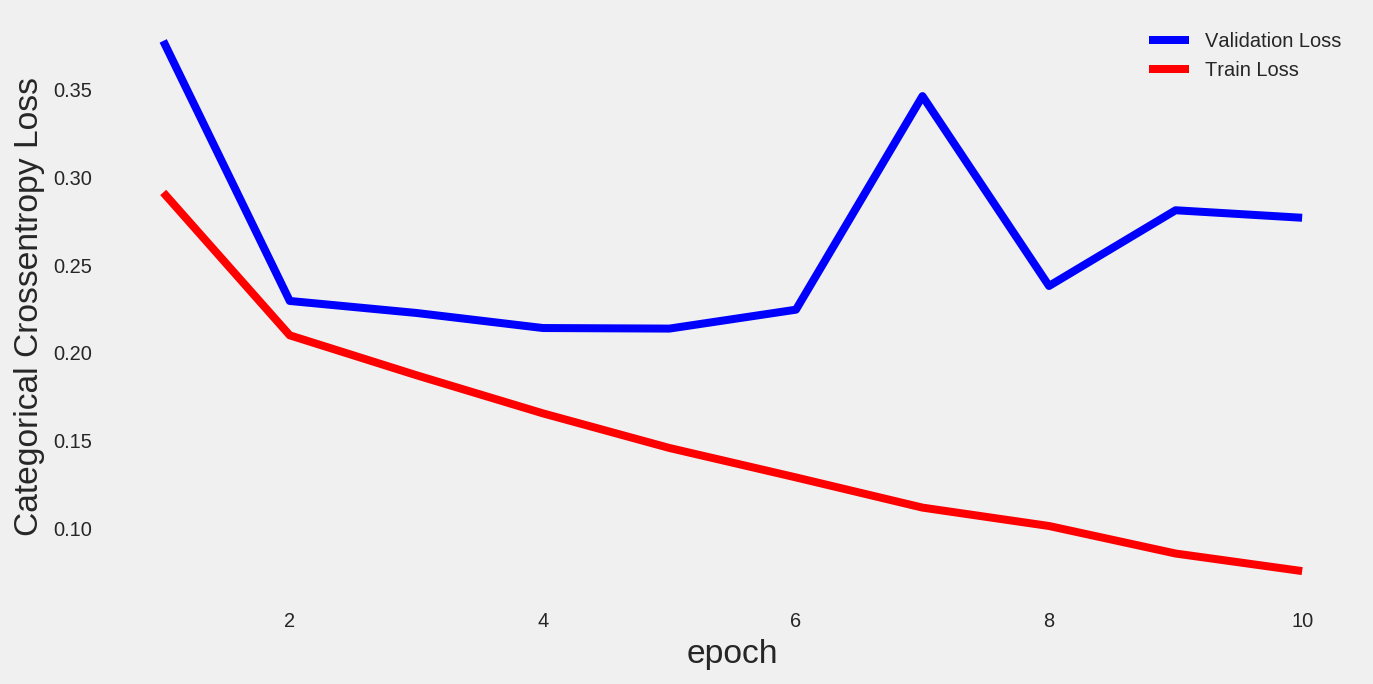

In [42]:
start = datetime.now()

history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, verbose=1,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))


score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs +1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


print('Time taken to run this cell :', datetime.now() - start)

In [48]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["S.R",'Model',"Test loss","Accuracy",]

x.add_row([(1),"Relu", 14.159, '12.15%'])
x.add_row([(2),"Sigmoid",  1.93, '87.88%'])
x.add_row([(3),'Sigmoid with Drop outs and BN', 0.277, '91.85%'])

x.get_string(title = "-----SUMMARY-----")

print(x)

+-----+-------------------------------+-----------+----------+
| S.R |             Model             | Test loss | Accuracy |
+-----+-------------------------------+-----------+----------+
|  1  |              Relu             |   14.159  |  12.15%  |
|  2  |            Sigmoid            |    1.93   |  87.88%  |
|  3  | Sigmoid with Drop outs and BN |   0.277   |  91.85%  |
+-----+-------------------------------+-----------+----------+
